In [1]:
!pip install livelossplot
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=bdbaada831dd784317bd00ef6ecafd952061bee5b233fdaa4fc3663d3aceb3af
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import cv2
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import sklearn.metrics as metrics


In [4]:
import kagglehub

# Download latest version
   = kagglehub.dataset_download("crawford/emnist")

print("Path to dataset files:", path)

100%|██████████| 1.24G/1.24G [00:13<00:00, 96.7MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/crawford/emnist/versions/3


In [6]:
train = pd.read_csv("/root/.cache/kagglehub/datasets/crawford/emnist/versions/3/emnist-balanced-train.csv",delimiter = ',')
test = pd.read_csv("/root/.cache/kagglehub/datasets/crawford/emnist/versions/3/emnist-balanced-test.csv", delimiter = ',')
mapp = pd.read_csv("/root/.cache/kagglehub/datasets/crawford/emnist/versions/3/emnist-balanced-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None)


In [7]:
train_x = train.iloc[:,1:]
train_y = train.iloc[:,0]

test_x = test.iloc[:,1:]
test_y = test.iloc[:,0]


In [8]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)


(112799, 784) (112799,) (18799, 784) (18799,)


In [9]:
def rotate(image):
    image = image.reshape([28, 28])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

#augmented

In [10]:
# Flip and rotate image
train_x = np.asarray(train_x)
train_x = np.apply_along_axis(rotate, 1, train_x)
print ("train_x:",train_x.shape)

test_x = np.asarray(test_x)
test_x = np.apply_along_axis(rotate, 1, test_x)
print ("test_x:",test_x.shape)

train_x: (112799, 28, 28)
test_x: (18799, 28, 28)


In [11]:
# Normalise
train_x = train_x.astype('float32')/255
test_x = test_x.astype('float32')/255

#range 0-1


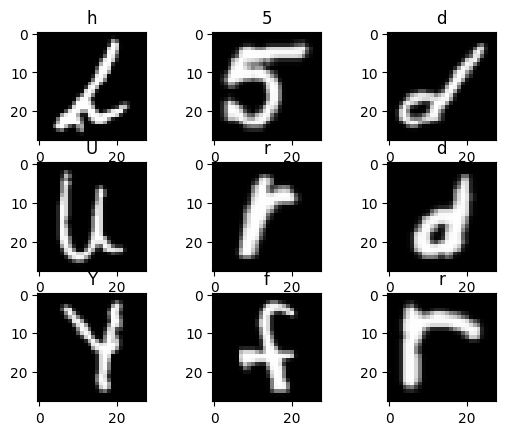

In [12]:
for i in range(100, 109):
    plt.subplot(330 + (i - 99))
    plt.imshow(train_x[i], cmap=plt.get_cmap('gray'))
    label = train_y.iloc[i]  # Retrieve label from train_y
    character = chr(mapp.loc[label].values[0])  # Get the character using .loc
    plt.title(character)

plt.show()


In [13]:
num_classes = train_y.nunique()
num_classes

# yang unik dipisahkan dan yang sama digabung menghadi 1 classs
# A-Z | a-z;
# c == C | z == Zbentuknya sama
# a != A bentuknya

# digit itu ada 0-9  -> 10 digit
# letter a-z         -> 26 letter
# letter A-Z         -> 26 letter
                      # ======== 62




47

In [14]:
# Define the number of classes based on the dataset
num_classes = len(mapp)
# print(num_classes)
# One-hot encode the labels
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)



In [15]:
# Reshape image for CNN
train_x = train_x.reshape(-1, 28, 28, 1)
test_x = test_x.reshape(-1, 28, 28, 1)

In [16]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size= 0.10, random_state=7)



In [17]:
model = Sequential()

model.add(Conv2D(filters=128, kernel_size=(5,5), padding = 'same', activation='relu',\
                 input_shape=(28, 28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3) , padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(units=num_classes, activation='softmax'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 128)         │           3,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         401,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 47)                  │           6,063 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,719 (1.85 MB)

 Trainable params: 484,719 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
history = model.fit(train_x, train_y, epochs=5, batch_size=512, verbose=1, \
                    validation_data=(val_x, val_y))

Epoch 1/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.3592 - loss: 2.3723 - val_accuracy: 0.8188 - val_loss: 0.5539
Epoch 2/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7413 - loss: 0.8286 - val_accuracy: 0.8428 - val_loss: 0.4499
Epoch 3/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.7885 - loss: 0.6562 - val_accuracy: 0.8537 - val_loss: 0.4136
Epoch 4/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8105 - loss: 0.5765 - val_accuracy: 0.8580 - val_loss: 0.3881
Epoch 5/5
199/199 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.8227 - loss: 0.5359 - val_accuracy: 0.8672 - val_loss: 0.3735


In [20]:
def plot_graph(epochs, train_metric, val_metric, title, ylabel):
    plt.plot(epochs, train_metric, 'b', label='Train')
    plt.plot(epochs, val_metric, 'r', label='Validation')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')
    plt.show()

# Extract metrics from history
acc = history.history['accuracy'] if 'accuracy' in history.history else history.history['acc']
val_acc = history.history['val_accuracy'] if 'val_accuracy' in history.history else history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)


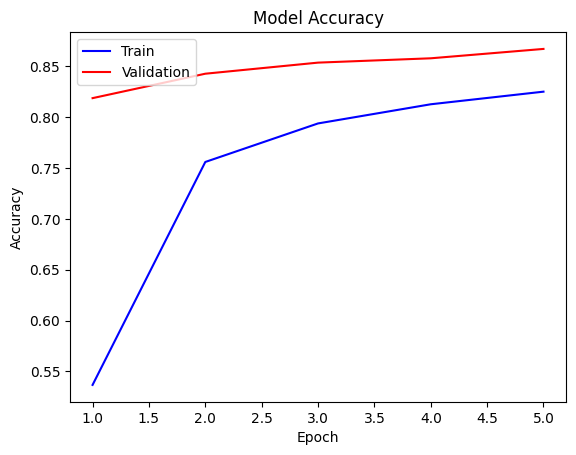

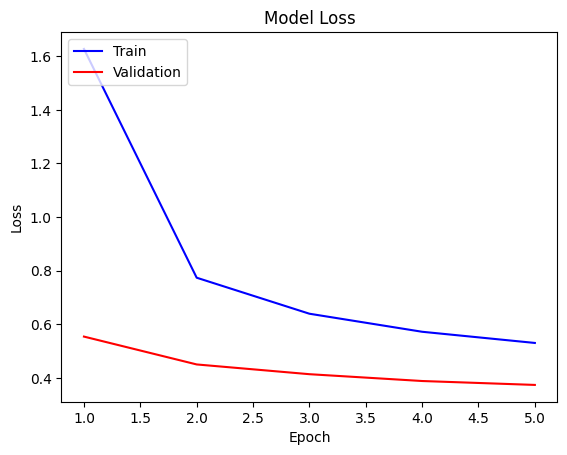

In [21]:
plot_graph(epochs, acc, val_acc, 'Model Accuracy', 'Accuracy')
plot_graph(epochs, loss, val_loss, 'Model Loss', 'Loss')

In [22]:
test_acc = model.evaluate(test_x, test_y)
print('Loss value is ',test_acc[0])
print('Accuracy value is ',test_acc[1])


588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8634 - loss: 0.4026
Loss value is  0.4004243314266205
Accuracy value is  0.8630778193473816


In [23]:
#Prediction
y_pred_test = model.predict(test_x)
# Finding shape
y_pred_test.shape

588/588 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


(18799, 47)

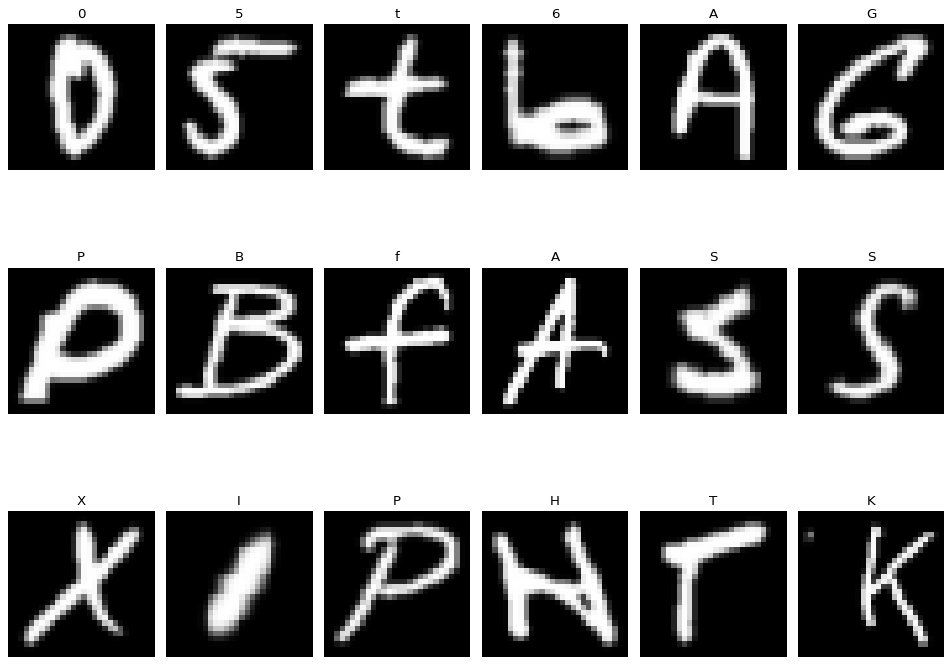

In [24]:
# Create label_dictionary from the mapping file (mapp)
label_dictionary = {index: chr(mapp.loc[index].values[0]) for index in mapp.index}


# Plot sample predictions
plt.figure(figsize=(12, 10), dpi=80)
for i in range(200, 218):
    plt.subplot(3, 6, i - 199)
    plt.imshow(test_x[i], cmap=plt.cm.gray)
    predicted_label = label_dictionary[y_pred_test[i].argmax()]
    plt.title(predicted_label)
    plt.axis('off')  # Hide axis for better visualization

plt.tight_layout()
plt.show()

[[259   0   0 ...   0   1   0]
 [  0 313   3 ...   1   0   0]
 [  0   0 334 ...   2   0   0]
 ...
 [  0   0   2 ... 197   0   0]
 [  0   0   0 ...   0 369   2]
 [  0   2   0 ...   0   4 356]]


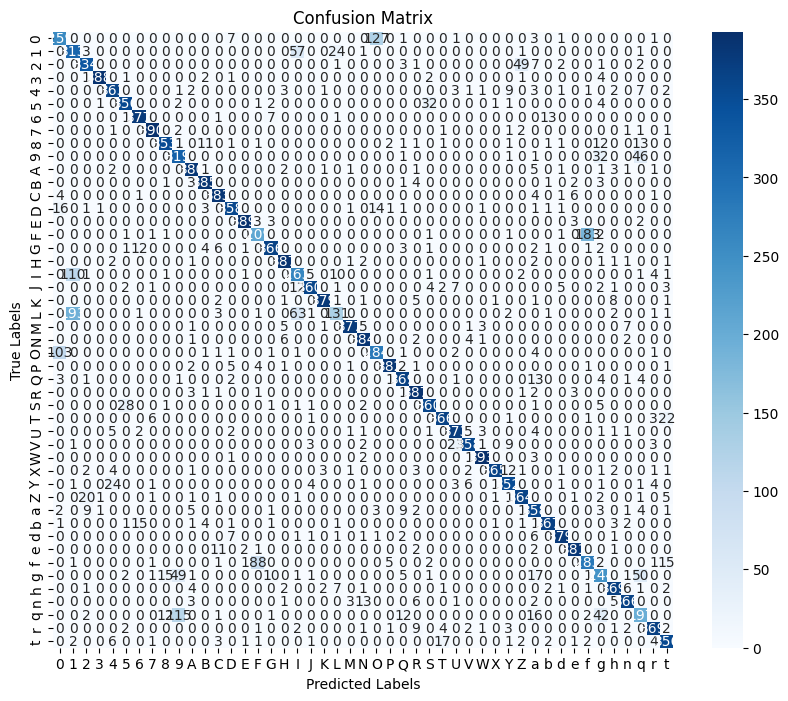

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.65      0.66       400
           1       0.50      0.78      0.61       400
           2       0.89      0.83      0.86       400
           3       0.99      0.97      0.98       400
           4       0.89      0.91      0.90       400
           5       0.90      0.89      0.90       400
           6       0.92      0.94      0.93       400
           7       0.97      0.97      0.97       400
           8       0.92      0.88      0.90       400
           9       0.65      0.80      0.72       400
           A       0.93      0.95      0.94       400
           B       0.93      0.96      0.95       400
           C       0.93      0.96      0.94       400
           D       0.93      0.90      0.91       400
           E       0.98      0.97      0.98       400
           F       0.67      0.52      0.59       400
           G       0.93      0.92      0.92       400
   

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict the classes for the test set
# y_pred_test = model.predict(test_x)


y_pred_classes = np.argmax(y_pred_test, axis=1)

# Convert test_y from one-hot encoded to label format
test_y_labels = np.argmax(test_y, axis=1)

# Compute Confusion Matrix
cm = confusion_matrix(test_y_labels, y_pred_classes)
print(cm)

# Define class_names before using it in sns.heatmap
unique_labels = np.unique(test_y_labels)  # Assuming test_y_labels are the true labels

class_names = [label_dictionary[label] for label in unique_labels]
# class_names = ['0','1','2','3','4','5','6','7','8','9',
            #  'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',
            #  'a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']

# Plot Confusion Matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(test_y_labels, y_pred_classes, target_names=class_names))

In [ ]:
print(label_dictionary)


{0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9', 10: 'A', 11: 'B', 12: 'C', 13: 'D', 14: 'E', 15: 'F', 16: 'G', 17: 'H', 18: 'I', 19: 'J', 20: 'K', 21: 'L', 22: 'M', 23: 'N', 24: 'O', 25: 'P', 26: 'Q', 27: 'R', 28: 'S', 29: 'T', 30: 'U', 31: 'V', 32: 'W', 33: 'X', 34: 'Y', 35: 'Z', 36: 'a', 37: 'b', 38: 'd', 39: 'e', 40: 'f', 41: 'g', 42: 'h', 43: 'n', 44: 'q', 45: 'r', 46: 't'}




In [30]:

from google.colab import files
import io
import cv2
import numpy as np

def predict_uploaded_image(model, uploaded_image):
    try:
        image = cv2.imdecode(np.frombuffer(uploaded_image, np.uint8), cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        image = np.invert(image) # Invert the image color
        image = image.astype('float32') / 255
        image = image.reshape(1, 28, 28, 1)
        prediction = model.predict(image)
        predicted_class = np.argmax(prediction)
        predicted_character = label_dictionary[predicted_class]
        return predicted_character
    except Exception as e:
      print(f"Error during prediction: {e}")
      return "Error"

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    predicted_character = predict_uploaded_image(model, uploaded[fn])
    print(f"Predicted character for {fn}: {predicted_character}")

Saving WhatsApp Image 2025-01-15 at 12.51.48.jpeg to WhatsApp Image 2025-01-15 at 12.51.48.jpeg
User uploaded file "WhatsApp Image 2025-01-15 at 12.51.48.jpeg" with length 8545 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted character for WhatsApp Image 2025-01-15 at 12.51.48.jpeg: T
